## How well do jobs and skills pay?

In [1]:
from datasets import load_dataset
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import matplotlib.ticker
import ast

dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else (x))

In [2]:
df_US = df[df['job_country']=="United States"].copy()

In [3]:
df_US.dropna(subset='salary_year_avg',inplace=True)

In [4]:
job_titles = df_US['job_title_short'].value_counts().index[:6].tolist()
job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [11]:
df_US_top6 = df_US[df_US['job_title_short'].isin (job_titles)].copy()


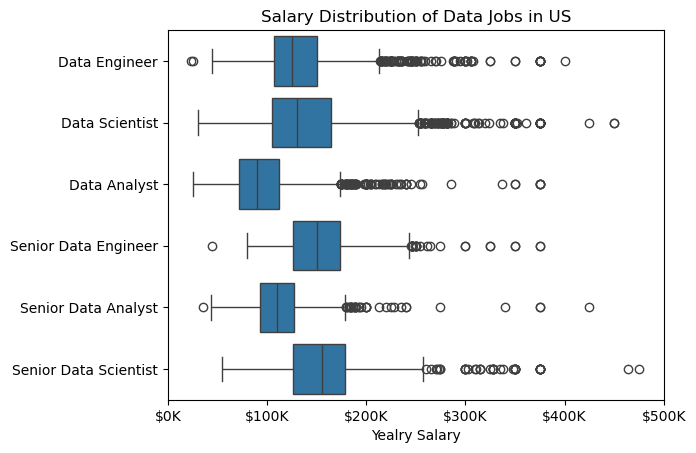

<Figure size 1000x1000 with 0 Axes>

In [13]:
sns.boxplot(data=df_US_top6,x='salary_year_avg',y='job_title_short')
plt.title("Salary Distribution of Data Jobs in US")
plt.xlabel("Yealry Salary")
plt.ylabel("")
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f'${int(x/1000)}K'))
plt.xlim(0,500000)
plt.figure(figsize=(10,10))
plt.tight_layout()
plt.show()

## Investigate Median Salary Vs Skill for Data Analysts

In [14]:
df_DA_US = df_US[df_US['job_title_short']=='Data Analyst'].copy()
df_DA_US_exploded = df_DA_US.explode('job_skills')

In [15]:
df_DA_US_stat = df_DA_US_exploded.groupby('job_skills').agg(
    skill_count = ('job_skills','count'),
    median = ('salary_year_avg','median')
    )
df_top_pay_job = df_DA_US_stat.sort_values(by='median',ascending=False).head(10)
df_top_pay_job

,skill_count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


In [16]:
df_high_demand_job = df_DA_US_stat.sort_values(by='skill_count',ascending=False).head(10)
df_high_demand_job.sort_values(by='median', ascending=False, inplace= True)
df_high_demand_job


,skill_count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


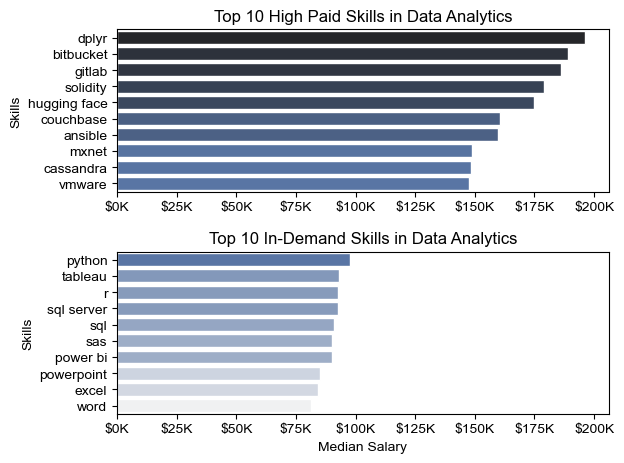

In [17]:
fig,ax = plt.subplots(2,1)
sns.set_theme(style='ticks')
sns.barplot(data=df_top_pay_job,x='median',y='job_skills',hue='median',palette='dark:b_r',legend= False, ax = ax[0])
ax[0].set_title("Top 10 High Paid Skills in Data Analytics")
ax[0].set_xlabel("")
ax[0].set_ylabel("Skills")
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f'${int(x/1000)}K' ))
sns.barplot(data=df_high_demand_job,x='median',y='job_skills',hue='median',palette='light:b',legend= False, ax = ax[1])
ax[1].set_title("Top 10 In-Demand Skills in Data Analytics")
ax[1].set_xlabel("Median Salary")
ax[1].set_ylabel("Skills")
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f'${int(x/1000)}K' ))
ax[1].set_xlim(ax[0].get_xlim())

plt.tight_layout()